In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('financials.csv')
data=data.iloc[:,2:]

In [3]:
data.head(5)

,Ticker,CIK,Year,Y-1 ROE,ROE,Y+1 ROE,Y-1 Asset,Asset,Y+1 Asset,Year-1 Revenue,...,Fiscal Year End,Y-1 Profit Margin,Y Profit Margin,Y+1 Profit Margin,Current Revenue YOY,Next Revenue YOY,Current Profit Margin YOY,Next Profit Margin YOY,Current ROE YOY,Future ROE YOY
0,A US,1090872,2002,3.185646,-20.066109,-55.240907,7986.0,8203.0,6297.0,8396.0,...,1031,0.020724,-0.171714,-0.339828,-0.284183,0.007654,NaN,-0.168114,-0.232518,-0.351748
1,A US,1090872,2003,-20.066109,-55.240907,11.543876,8203.0,6297.0,7144.0,6010.0,...,1031,-0.171714,-0.339828,0.071512,0.007654,-0.147952,-0.168114,0.411340,-0.351748,0.667848
2,A US,1090872,2006,8.549020,85.573813,18.541122,6751.0,7369.0,7554.0,4685.0,...,1031,0.069797,0.664991,0.117712,0.061473,0.089885,1.004819,-0.547279,0.770248,-0.670327
3,A US,1090872,2007,85.573813,18.541122,23.925427,7369.0,7554.0,7437.0,4973.0,...,1031,0.664991,0.117712,0.120021,0.089885,0.065314,-0.547279,0.002309,-0.670327,0.053843
4,A US,1090872,2008,18.541122,23.925427,-1.224087,7554.0,7437.0,7612.0,5420.0,...,1031,0.117712,0.120021,-0.006918,0.065314,-0.223935,0.002309,-0.126939,0.053843,-0.251495


## Summary Statistics and Data Quality Assessment

In [4]:
# Display summary statistics for numerical columns
print(data.describe())

# Unique values for certain columns
print(data['Ticker'].nunique())
print(data['CIK'].nunique())


                CIK         Year      Y-1 ROE          ROE      Y+1 ROE  \
count  3.320000e+03  3320.000000  3052.000000  3077.000000  3047.000000   
mean   8.257492e+05  2013.842169    19.112318    20.063956    20.347099   
std    4.629840e+05     6.047250    42.172603    40.997847    38.194183   
min    1.800000e+03  1999.000000  -355.519616  -201.146254  -183.473422   
25%    7.075490e+05  2009.000000     8.069739     8.369898     8.485865   
50%    9.098320e+05  2015.000000    15.133488    15.570795    15.681903   
75%    1.100682e+06  2019.000000    25.099894    25.967483    26.387725   
max    1.781335e+06  2023.000000  1048.621554  1048.621554   889.337152   

          Y-1 Asset         Asset     Y+1 Asset  Year-1 Revenue  \
count  3.250000e+03  3.280000e+03  3.248000e+03     3253.000000   
mean   3.297198e+04  3.534493e+04  3.784356e+04    15425.777707   
std    8.597439e+04  9.039967e+04  9.685355e+04    31594.130019   
min    0.000000e+00  9.923400e+01  0.000000e+00        0

### Trend Analysis (Example with Revenue)

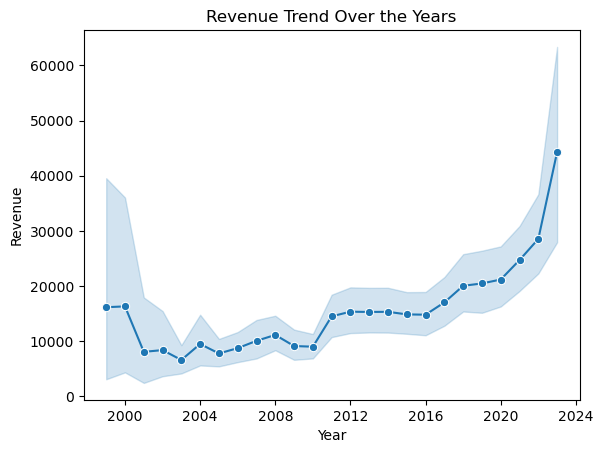

In [5]:
# Convert 'YEAR' to datetime format if not already
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Plotting Revenue trend over the years
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=data, x='Year', y='Revenue', marker='o')
plt.title('Revenue Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()


### Correlation Analysis

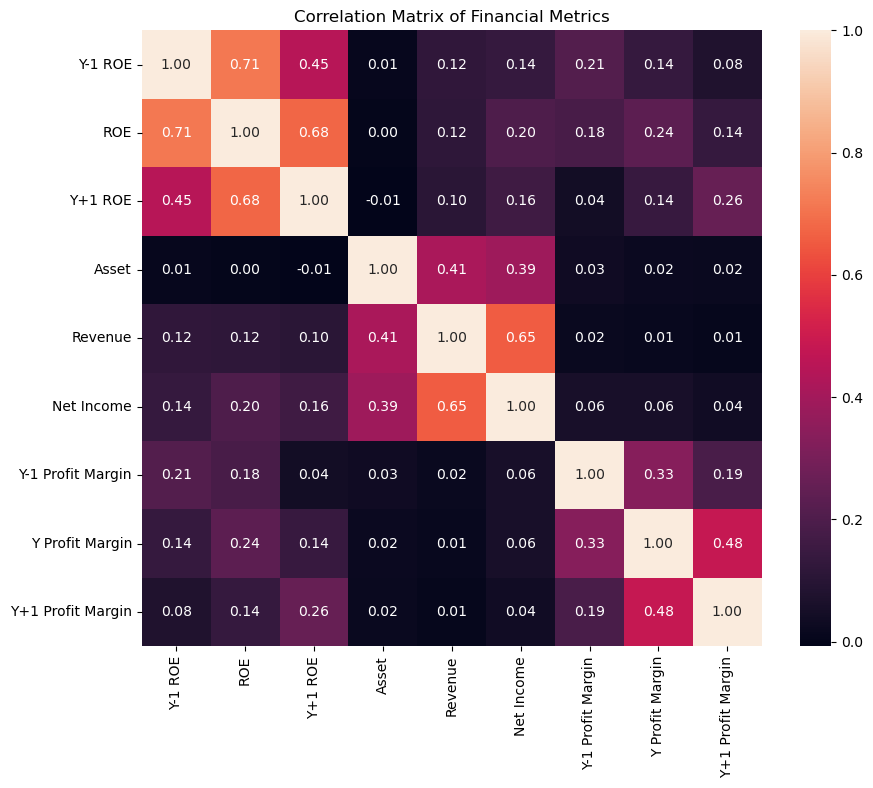

In [6]:
# Selecting numerical columns for correlation analysis
numerical_cols = ['Y-1 ROE', 'ROE', 'Y+1 ROE', 'Asset', 'Revenue', 'Net Income', 'Y-1 Profit Margin', 'Y Profit Margin', 'Y+1 Profit Margin']
corr_matrix = data[numerical_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Financial Metrics')
plt.show()


### Advanced Visualizations¶

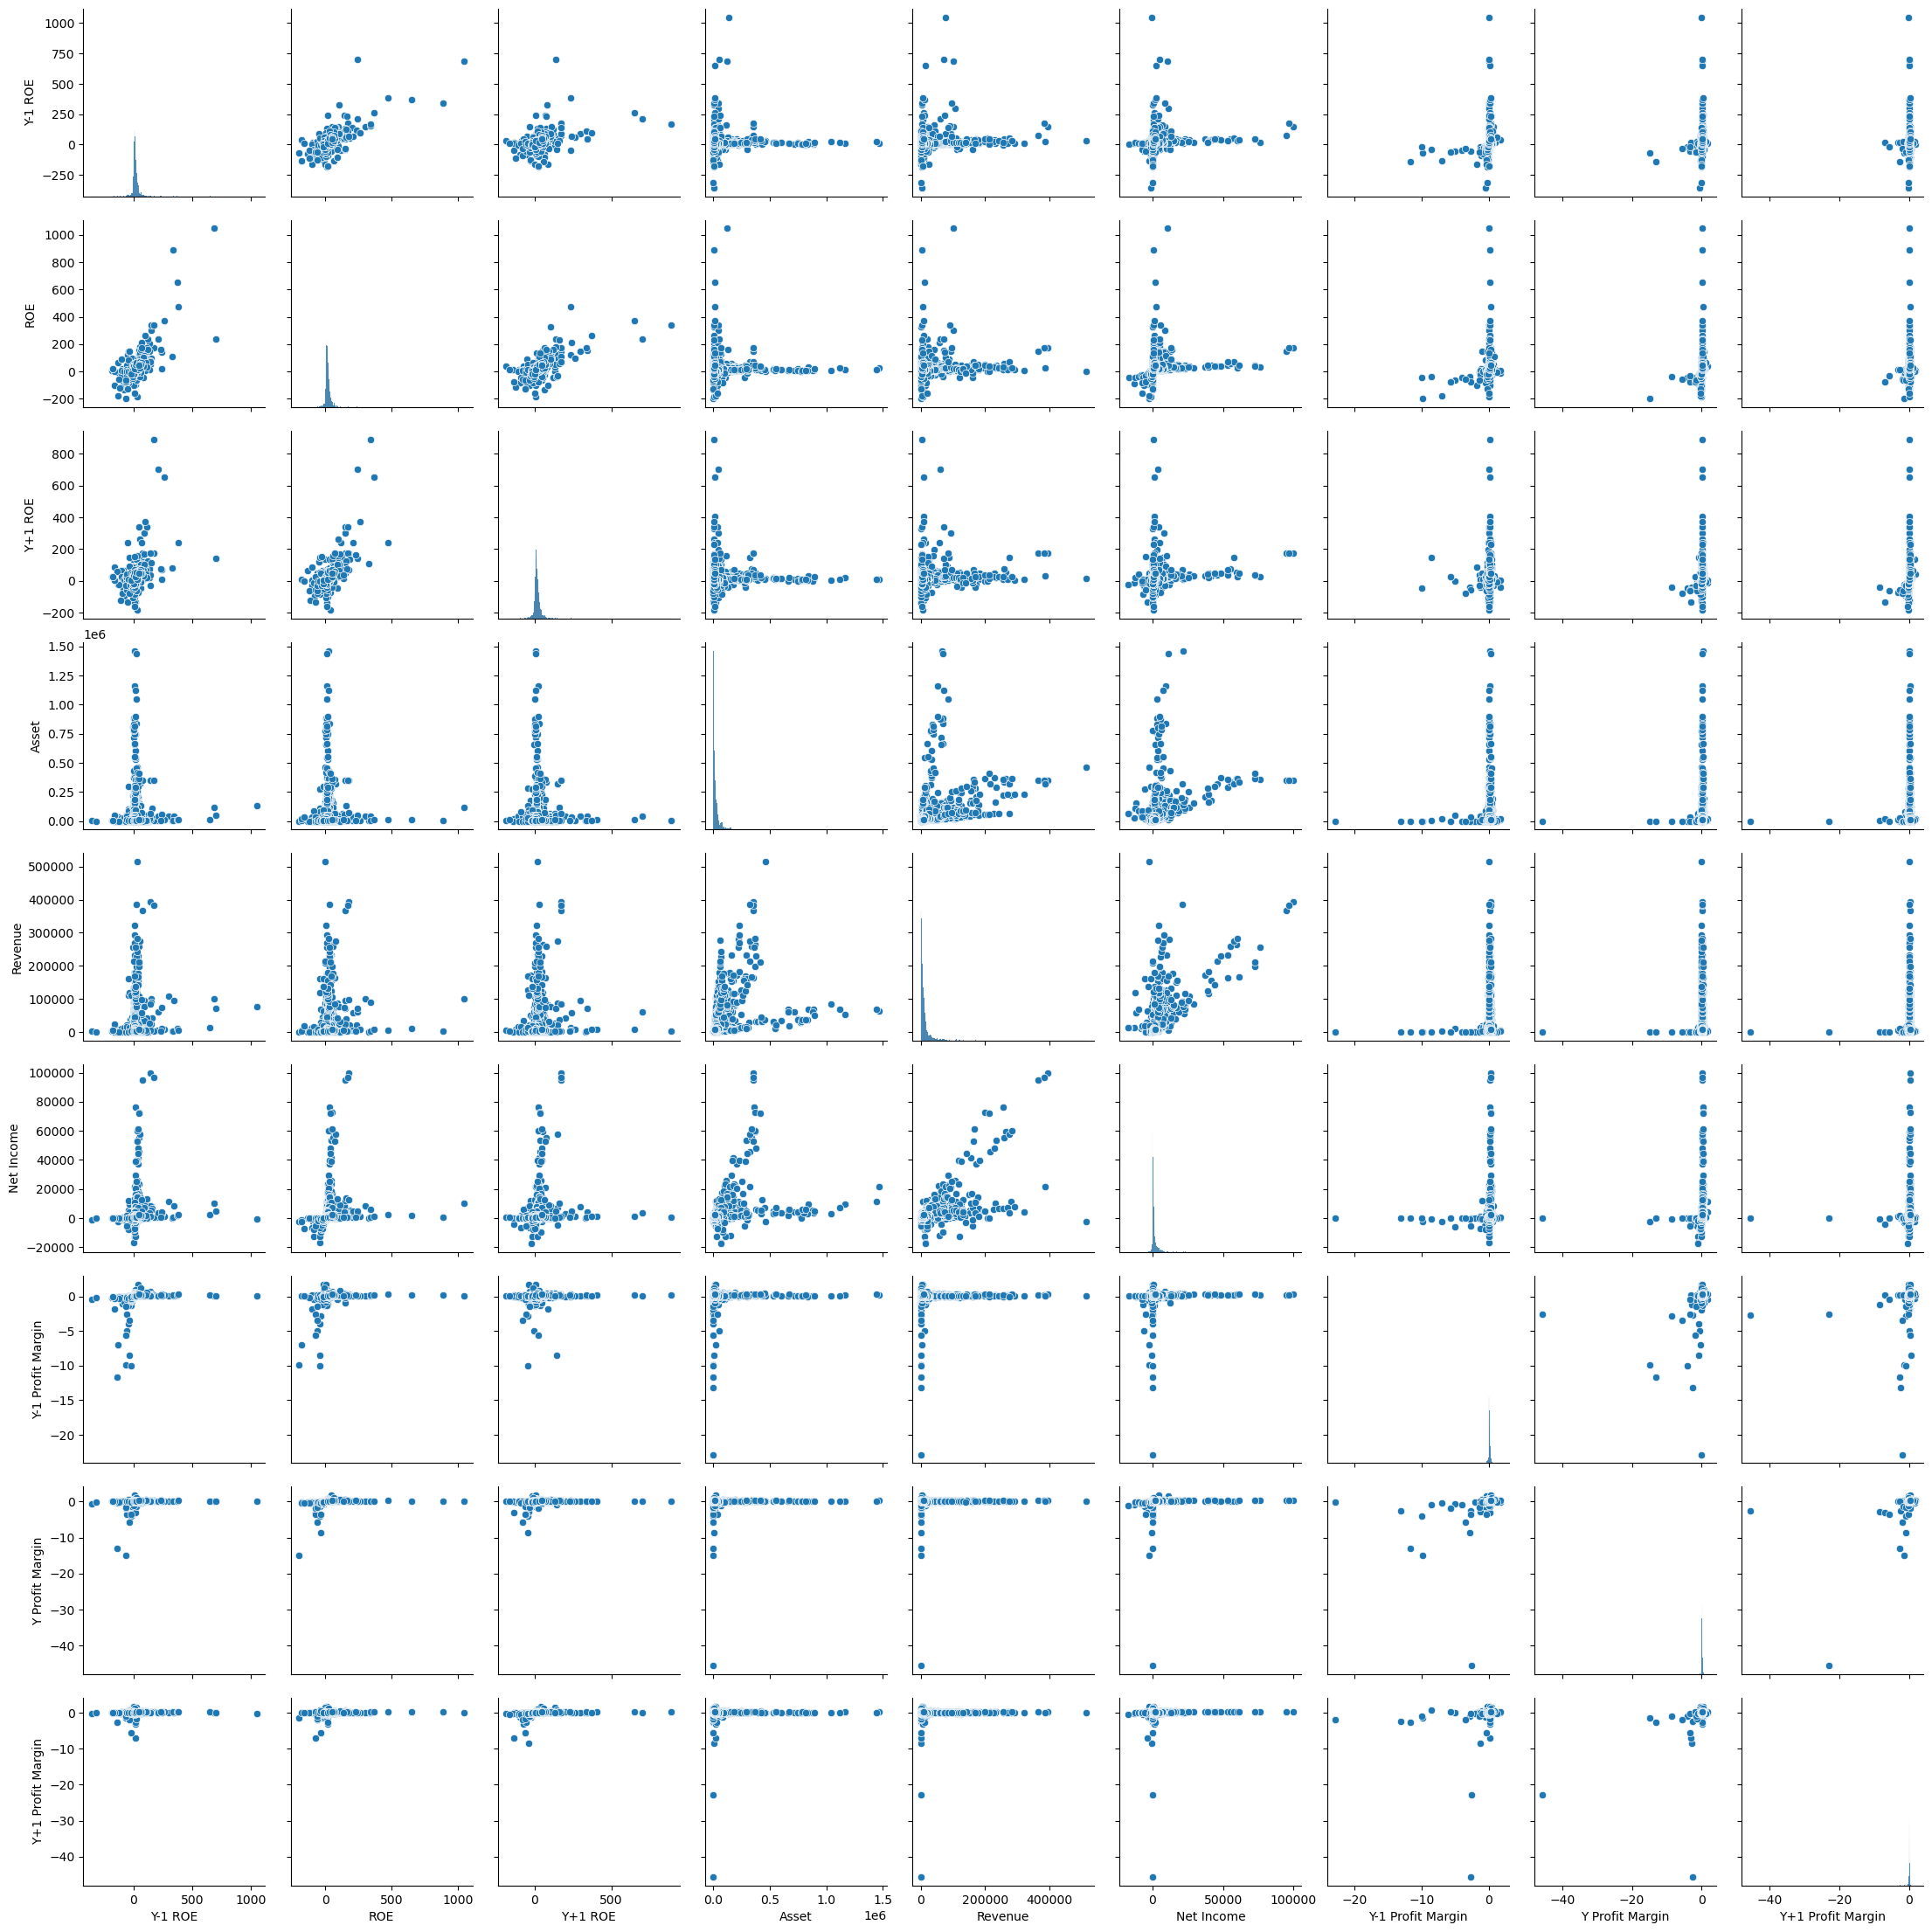

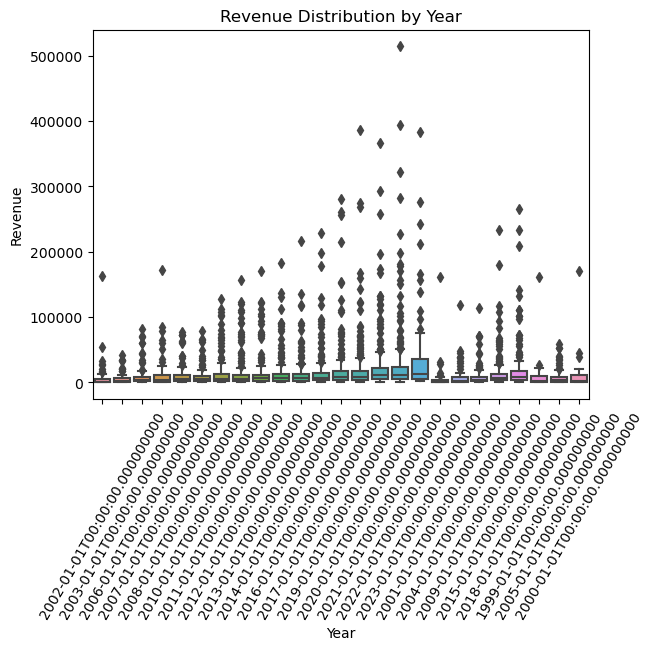

In [7]:
sns.pairplot(data[numerical_cols])
plt.show()
sns.boxplot(x='Year', y='Revenue', data=data)
plt.title('Revenue Distribution by Year')
plt.xticks(rotation=60)
plt.show()
